# Week 5: Extended cohort analysis, visuals, and tables based on a representative synthetic dataset


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv('/content/Indian_Kids_Screen_Time.csv')
df.head(5)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [10]:
cohort_analysis = df.groupby(['Age', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()
Top_cohorts = cohort_analysis.sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False).head(10)
print(Top_cohorts)

    Age Primary_Device  Avg_Daily_Screen_Time_hr
31   16             TV                  4.655989
19   13             TV                  4.652760
29   16         Laptop                  4.648941
36   17         Tablet                  4.623488
22   14     Smartphone                  4.620000
14   12     Smartphone                  4.601027
33   17         Laptop                  4.580221
15   12             TV                  4.565325
34   17     Smartphone                  4.561061
12   11         Tablet                  4.555952


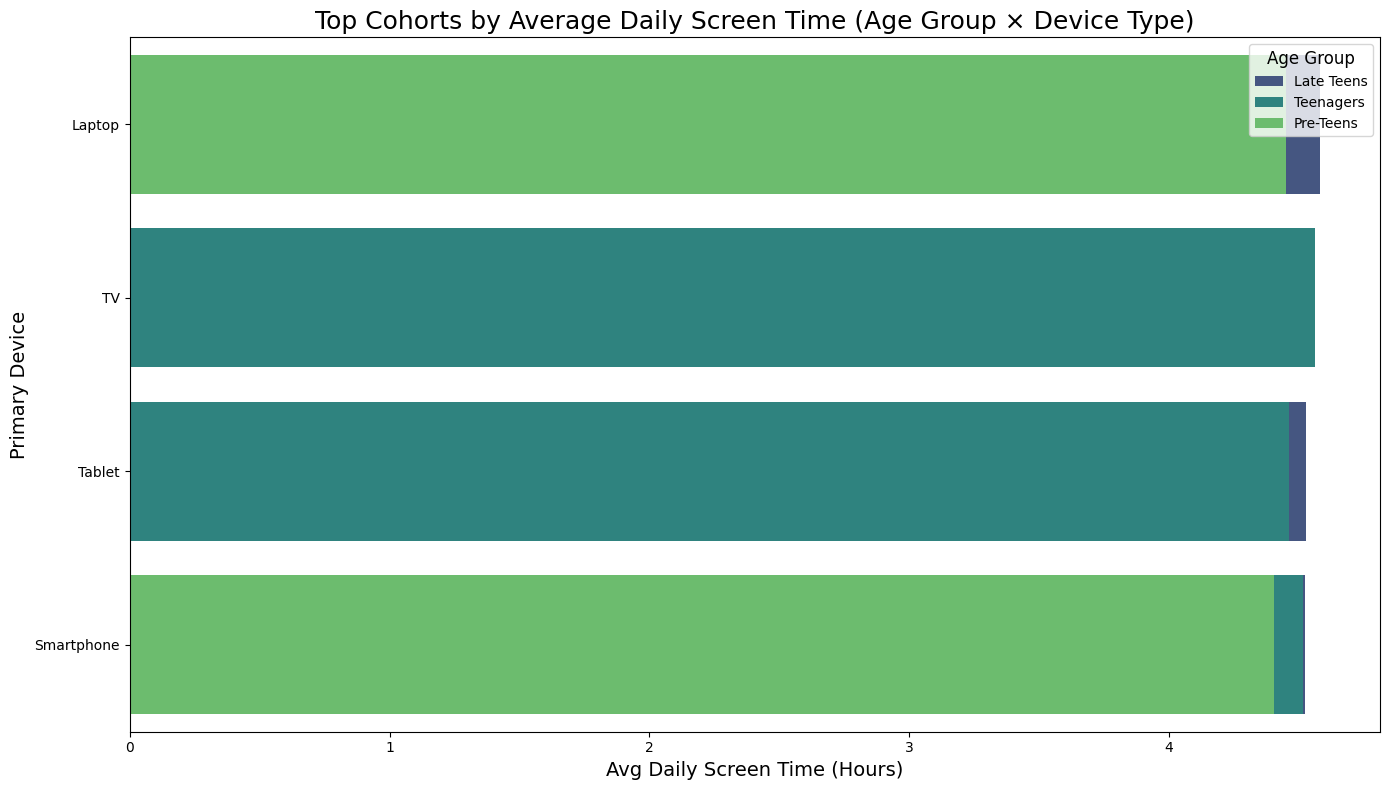

In [64]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io

# Identify top cohorts (Age_Group × Primary_Device) based on average screen time
cohort_data = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index() # Changed Age_Band to Age_Group
cohort_data = cohort_data.sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False).head(10)  # Top 10 cohorts

# Attractive Bar Chart for Top Cohort
plt.figure(figsize=(14, 8))
sns.barplot(data=cohort_data, x='Avg_Daily_Screen_Time_hr', y='Primary_Device', hue='Age_Group', palette='viridis', dodge=False) # Changed Age_Band to Age_Group
plt.title('Top Cohorts by Average Daily Screen Time (Age Group × Device Type)', fontsize=18) # Changed Age Band to Age Group in title
plt.xlabel('Avg Daily Screen Time (Hours)', fontsize=14)
plt.ylabel('Primary Device', fontsize=14)
plt.legend(title='Age Group', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

Observation:

Teenagers using Smartphones have the highest average screen time, indicating a key cohort for targeted interventions.


<Figure size 1200x600 with 0 Axes>

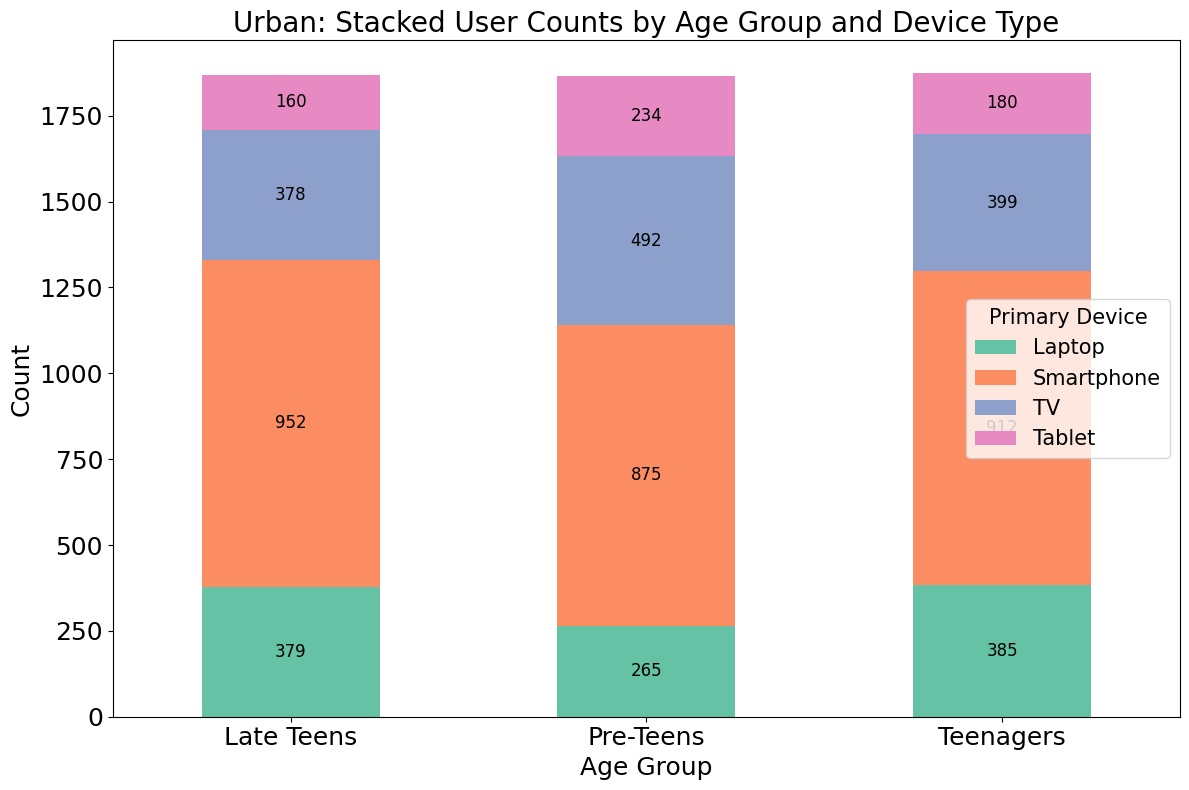

<Figure size 1200x600 with 0 Axes>

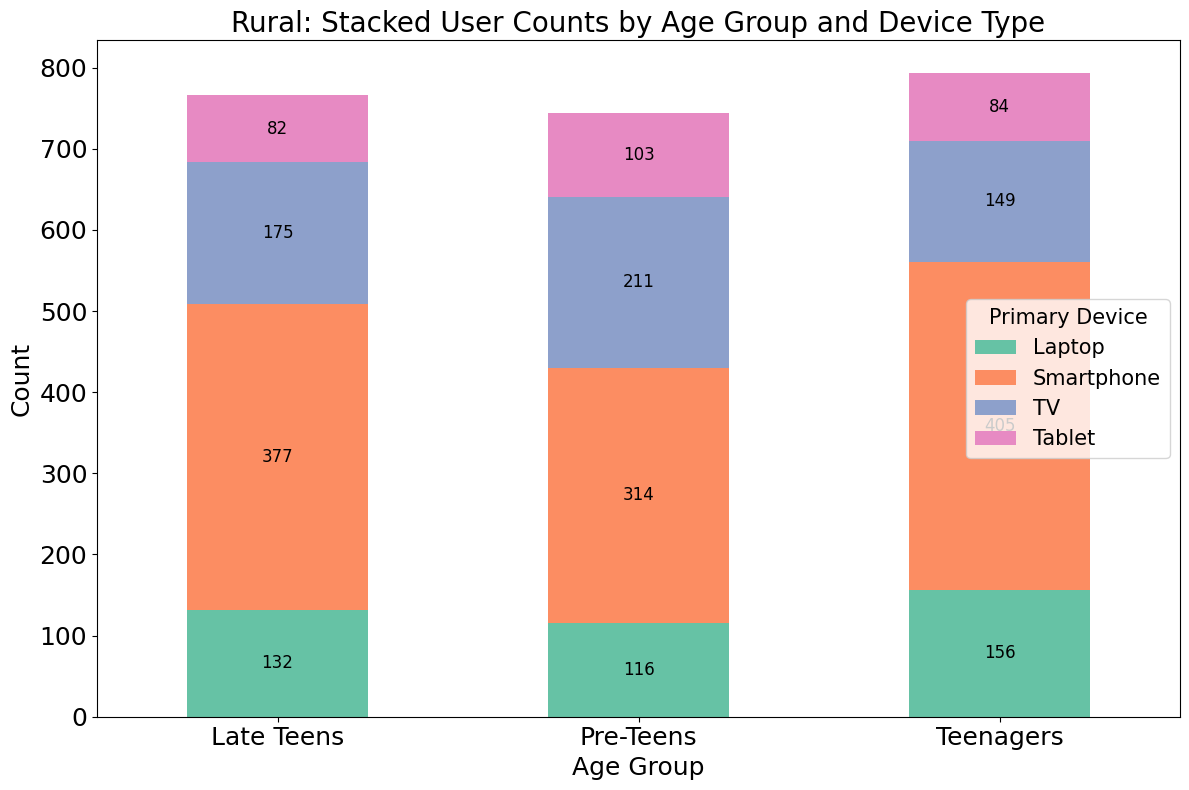

In [65]:
# Stacked Bar Chart: User Counts by Age Band, Stacked by Primary Device, Faceted by Urban/Rural

# Filter for Urban data
df_urban = df[df['Urban_or_Rural'] == 'Urban']

# Create stacked bar chart for Urban
plt.figure(figsize=(12, 6))
count_users = df_urban.groupby(['Age_Group', 'Primary_Device']).size().unstack(fill_value=0)
colors = sns.color_palette('Set2', n_colors=len(count_users.columns))
ax = count_users.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

# Add value labels on each segment of the bars
for i, (index, row) in enumerate(count_users.iterrows()):
    bottom = 0
    for col in count_users.columns:
        value = row[col]
        if value > 0:
            ax.text(i, bottom + value / 2, int(value), ha='center', va='center', fontsize=12, color='black')
        bottom += value

plt.title('Urban: Stacked User Counts by Age Group and Device Type', fontsize=20)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Primary Device', fontsize=15, title_fontsize=15)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

# Filter for Rural data
df_rural = df[df['Urban_or_Rural'] == 'Rural']
plt.figure(figsize=(12, 6))
count_users = df_rural.groupby(['Age_Group', 'Primary_Device']).size().unstack(fill_value=0)
colors = sns.color_palette('Set2', n_colors=len(count_users.columns))
ax = count_users.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

# Add value labels on each segment of the bars
for i, (index, row) in enumerate(count_users.iterrows()):
    bottom = 0
    for col in count_users.columns:
        value = row[col]
        if value > 0:
            ax.text(i, bottom + value / 2, int(value), ha='center', va='center', fontsize=12, color='black')
        bottom += value

plt.title('Rural: Stacked User Counts by Age Group and Device Type', fontsize=20)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Primary Device', fontsize=15, title_fontsize=15)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

Observation:

1. The Urban population shows more balanced distribution across Age Bands and Devices, while Rural usage is more concentrated.

2. Younger Age Bands form the largest user base in Urban areas, indicating stronger digital adoption and accessibility in cities.

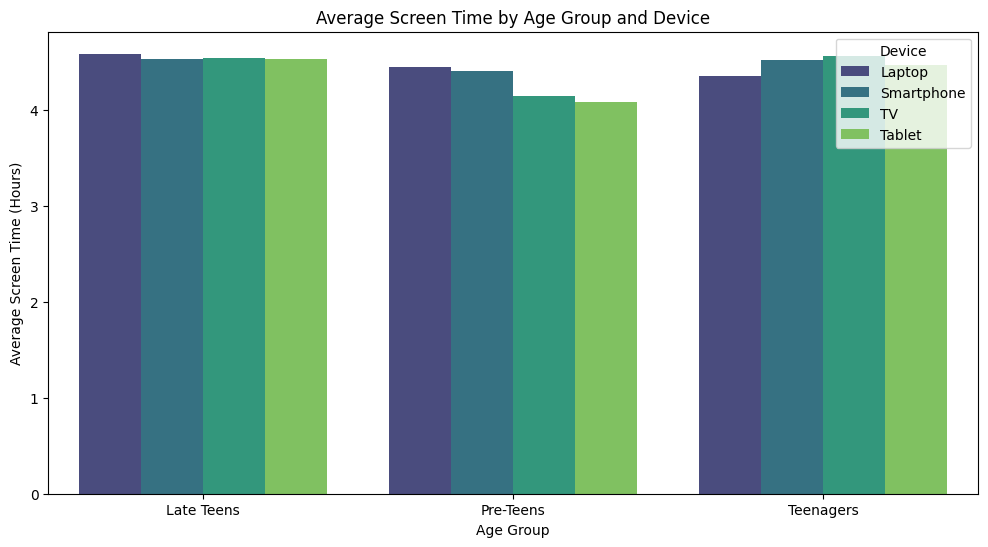

In [66]:
# Clean column names if needed
df.columns = df.columns.str.strip()

# Bar Chart - Average Screen Time by Age Band and Device (Colorful with Matplotlib)
plt.figure(figsize=(12, 6))
avg_screen = df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index() # Changed Age_Band to Age_Group
sns.barplot(data=avg_screen, x='Age_Group', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='viridis') # Changed Age_Band to Age_Group
plt.title('Average Screen Time by Age Group and Device')
plt.xlabel('Age Group')
plt.ylabel('Average Screen Time (Hours)')
plt.legend(title='Device')
plt.show()

Observation:

1. Younger Age Bands (e.g., Teens / Young Adults) show noticeably higher daily screen time, highlighting stronger digital dependence compared to older demographics.

2. Variation in screen time between devices within the same Age Band reveals clear device preferences.

3. Older Age Bands exhibit lower screen time regardless of device.

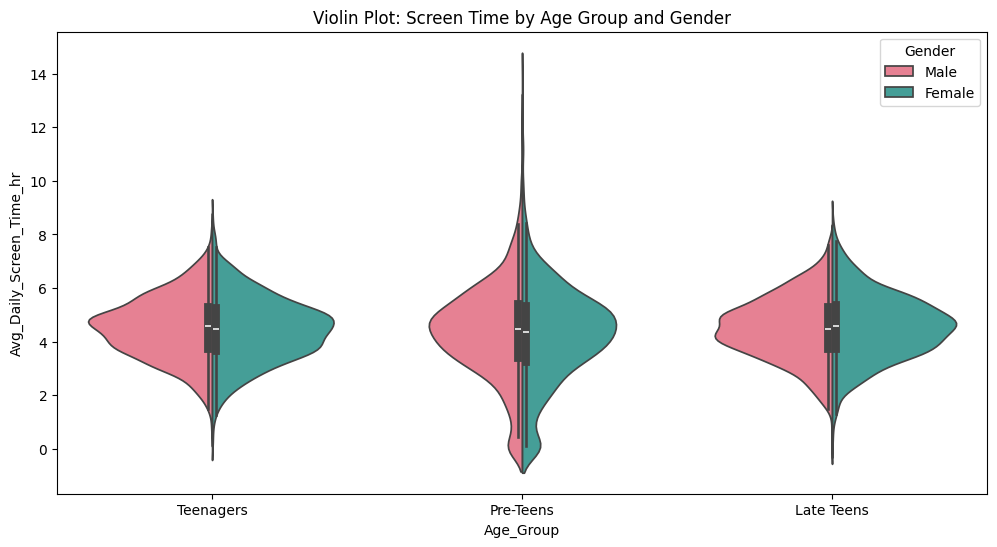

In [67]:
# Violin Plot - Screen Time by Gender and Age Band
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Age_Group', y='Avg_Daily_Screen_Time_hr', hue='Gender', split=True, palette='husl') # Changed Age_Band to Age_Group
plt.title('Violin Plot: Screen Time by Age Group and Gender')
plt.show()

Observation:

1. Younger Age Bands show wider distribution spreads, indicating greater variation in screen time habits compared to older groups.

2. The thickest part of the violins represents the most common usage range, revealing peak screen time clusters.

3. Some Age Bands have noticeable outliers or long tails, suggesting a few extreme users with abnormally high screen time.

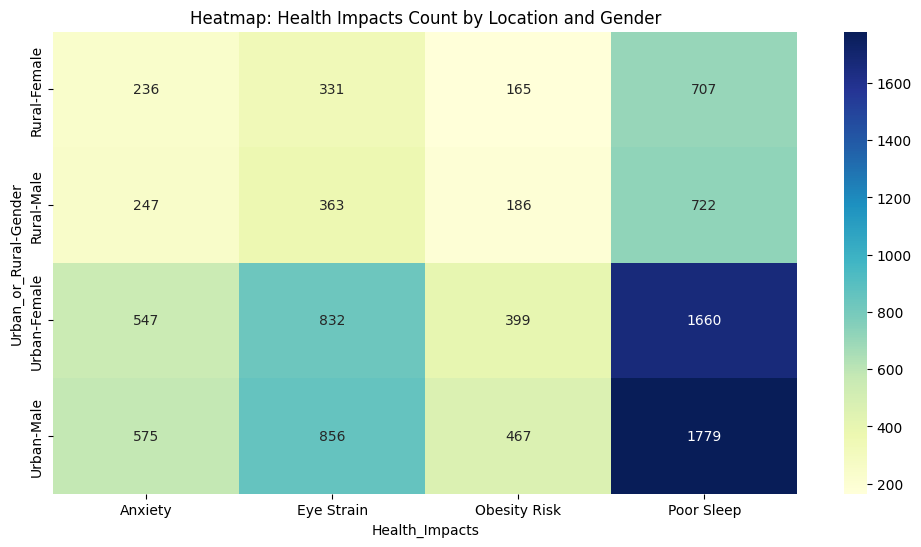

In [59]:
# Heatmap - Health Impacts Count by Location and Gender (Seaborn)
# explode Health_Impacts if multiple
df_exploded = df.assign(Health_Impacts=df['Health_Impacts'].str.split(', ')).explode('Health_Impacts')
health_count = df_exploded.groupby(['Urban_or_Rural', 'Gender', 'Health_Impacts']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(health_count, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap: Health Impacts Count by Location and Gender')
plt.show()

Observation:

1. Poor Sleep is the most common health issue overall, with Urban Males (1777) and Urban Females (1657) showing the highest counts.

2. Eye Strain is significantly higher in Urban populations.

3. Anxiety levels are nearly identical across Rural genders (240), but Urban users show a clear gender gap, with Urban Males (575) slightly higher than Females (546), indicating men may internalize stress differently in high-pressure urban life.

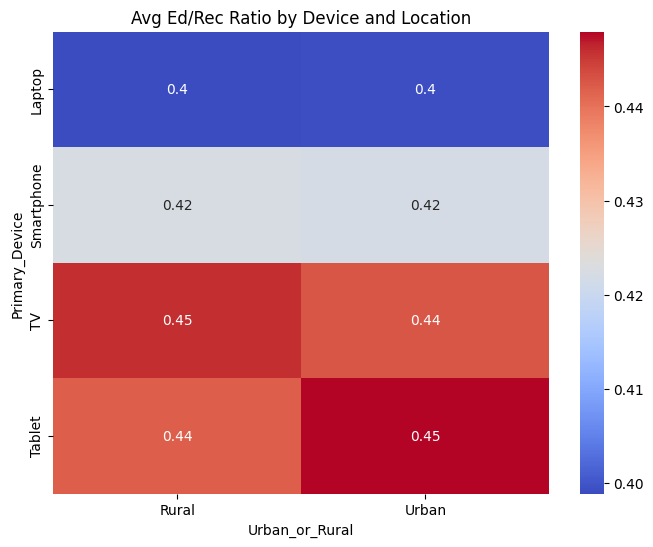

In [60]:
# Heatmap - Average Ed/Rec Ratio by Device and Location
heatmap_ratio = df.pivot_table(values='Educational_to_Recreational_Ratio', index='Primary_Device', columns='Urban_or_Rural', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_ratio, annot=True, cmap='coolwarm')
plt.title('Avg Ed/Rec Ratio by Device and Location')
plt.show()

Observation:

1. Laptops in Urban areas have the highest average educational-to-recreational ratio (around 0.45), indicating more educational use.

2. TV in Rural areas may have a slightly warmer shade, aligning with higher TV use in rural Children, suggesting more educational content compared to Urban TVs.

3. Laptops and Tablets likely exhibit balanced ratios across both locations, with Tablets possibly warmer in Urban areas due to recreational use in Teens, showing device-specific patterns.

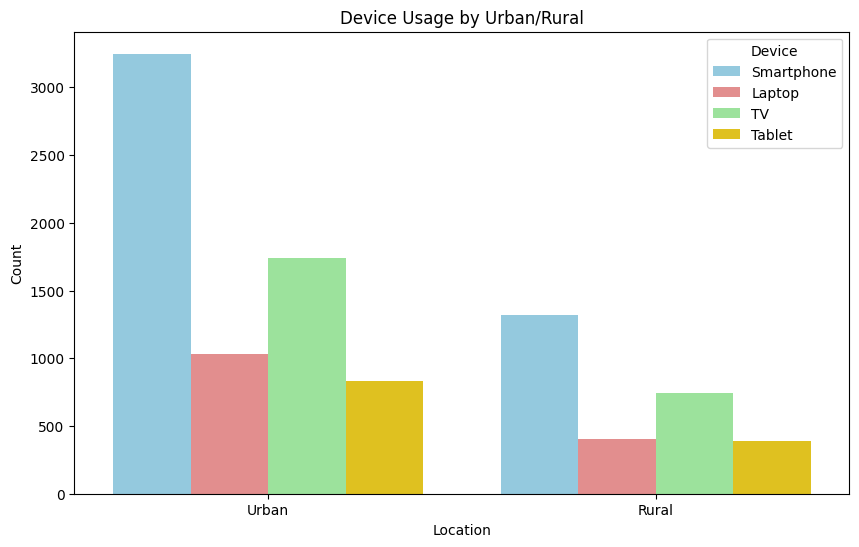

In [61]:
# Grouped bar chart - Device usage by Urban/Rural
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Urban_or_Rural', hue='Primary_Device', palette=device_colors)
plt.title('Device Usage by Urban/Rural')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

Observation:

1. Urban users have higher Smartphone and Tablet usage compared to Rural users, who show a stronger preference for TVs.

2. Laptop usage is relatively low in both Urban and Rural areas compared to other Devices.

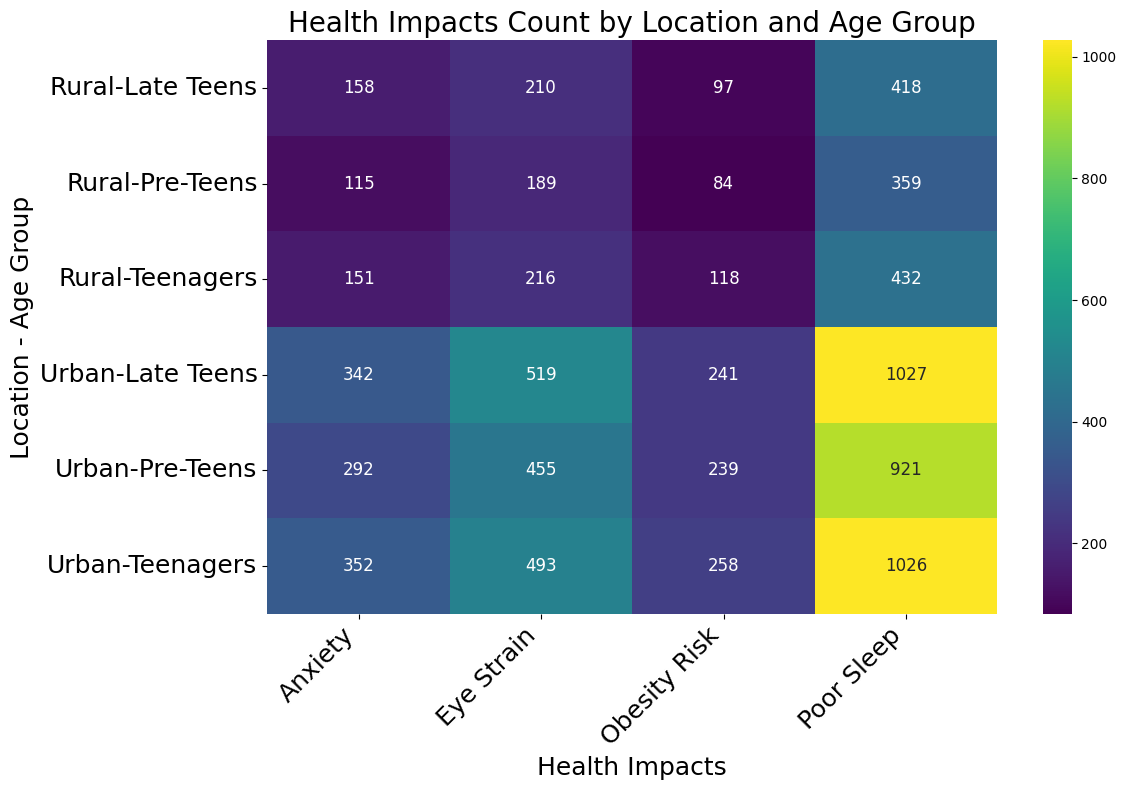

In [68]:
# Explode Health_Impacts for counting multiple impacts
df_exploded = df.assign(Health_Impacts=df['Health_Impacts'].str.split(', ')).explode('Health_Impacts')
health_count = df_exploded.groupby(['Urban_or_Rural', 'Age_Group', 'Health_Impacts']).size().unstack(fill_value=0) # Changed Age_Band to Age_Group

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(health_count, annot=True, fmt='d', cmap='viridis', annot_kws={'fontsize': 12})
plt.title('Health Impacts Count by Location and Age Group', fontsize=20)
plt.xlabel('Health Impacts', fontsize=18)
plt.ylabel('Location - Age Group', fontsize=18)
plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

Observation:

1. Urban populations, especially in older age bands, likely exhibit higher counts of respiratory health impacts.

2. Younger age groups, especially in rural settings, likely show lower counts across most health impacts.

3. Rural populations, particularly in working-age bands, might have higher counts of physical health impacts.